In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
from html.parser import HTMLParser
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
stop_words = stopwords.words('english')
stop_words.extend(['go', 'get', 'via', 'need', 'like', 'us', 'due', 'went', 'going'])
STOPWORDS = set(stop_words)
stopwords = set(STOPWORDS)

data = pd.read_csv('/content/drive/My Drive/6000/train.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Sentiment distribution

Pentaclassfication

In [3]:
count5 = data['emotion'].value_counts()
count5.rename(index={0:'Extremely Negative', 1:'Negative', 2:'Neutral', 3:'Positive', 4:'Extremely Positive'},inplace=True)
print(count5)

Positive              11420
Negative               9916
Neutral                7712
Extremely Positive     6622
Extremely Negative     5481
Name: emotion, dtype: int64


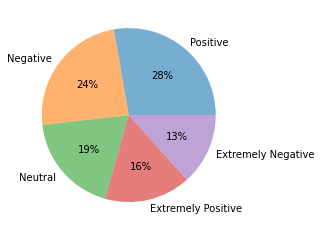

In [4]:
labels5 = count5.index
sizes5 = count5.values
plt.pie(sizes5,labels=labels5,autopct='%.0f%%', textprops = {'fontsize':10, 'color':'k'}, wedgeprops={'alpha':0.6})
plt.show()
#plt.savefig('distribution5.jpg',dpi=500)

tripleclassification

In [5]:
data1 = data.copy()
data1['emotion'] = data1['emotion'].replace(0, 1)
data1['emotion'] = data1['emotion'].replace(4, 3)
count3 = data1['emotion'].value_counts()
count3.rename(index={1:'Negative', 2:'Neutral', 3:'Positive'},inplace=True)
print(count3)

Positive    18042
Negative    15397
Neutral      7712
Name: emotion, dtype: int64


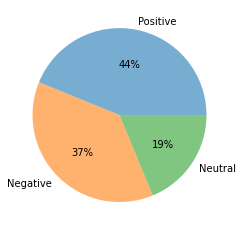

In [6]:
labels3 = count3.index
sizes3 = count3.values
plt.pie(sizes3,labels=labels3,autopct='%.0f%%', textprops = {'fontsize':10, 'color':'k'}, wedgeprops={'alpha':0.6})
plt.show()
#plt.savefig('distribution3.jpg',dpi=500)

#Time Series

In [7]:
t = pd.read_csv('/content/drive/My Drive/6000/time_location.csv')
t

,Location,TweetAt,Sentiment
0,London,16-03-2020,Neutral
1,UK,16-03-2020,Positive
2,Vagabonds,16-03-2020,Positive
3,NaN,16-03-2020,Positive
4,NaN,16-03-2020,Extremely Negative
...,...,...,...
44944,Israel ??,16-03-2020,Positive
44945,"Farmington, NM",16-03-2020,Negative
44946,"Haverford, PA",16-03-2020,Neutral
44947,NaN,16-03-2020,Extremely Negative


In [8]:
# 不分析Location，国家地区信息太乱了
loc = Counter(t['Location'])
loc.most_common(20)

[(nan, 9423),
 ('United States', 603),
 ('London, England', 568),
 ('London', 565),
 ('New York, NY', 429),
 ('Washington, DC', 411),
 ('United Kingdom', 355),
 ('Los Angeles, CA', 314),
 ('India', 283),
 ('UK', 246),
 ('USA', 243),
 ('Australia', 236),
 ('Canada', 220),
 ('England, United Kingdom', 200),
 ('Toronto, Ontario', 189),
 ('California, USA', 178),
 ('San Francisco, CA', 171),
 ('Chicago, IL', 170),
 ('Global', 164),
 ('Boston, MA', 156)]

In [9]:
t['TweetAt'] = pd.to_datetime(t['TweetAt'],format="%d-%m-%Y")
ts=t[['TweetAt','Sentiment']]

In [11]:
t_s = ts.groupby(['TweetAt','Sentiment']).size()
time = t_s.index.levels[0].tolist()

senti0 = [0]*len(time)
senti1 = [0]*len(time)
senti2 = [0]*len(time)
senti3 = [0]*len(time)
senti4 = [0]*len(time)
for i in range(len(time)):
  for j in range(len(t_s)):
    if t_s.index[j][0] == time[i]:
      if t_s.index[j][1] == 'Extremely Negative':
        senti0[i] = t_s[j]
      elif t_s.index[j][1] == 'Negative':
        senti1[i] = t_s[j]
      elif t_s.index[j][1] == 'Neutral':
        senti2[i] = t_s[j]
      elif t_s.index[j][1] == 'Positive':
        senti3[i] = t_s[j]
      elif t_s.index[j][1] == 'Extremely Positive':
        senti4[i] = t_s[j]
      else:
        print('Wrong')

In [12]:
for i in range(len(time)):
  senti1[i] = senti0[i]+senti1[i]
  senti2[i] = senti0[i]+senti1[i]+senti2[i]
  senti3[i] = senti0[i]+senti1[i]+senti2[i]+senti3[i]
  senti4[i] = senti0[i]+senti1[i]+senti2[i]+senti3[i]+senti4[i]

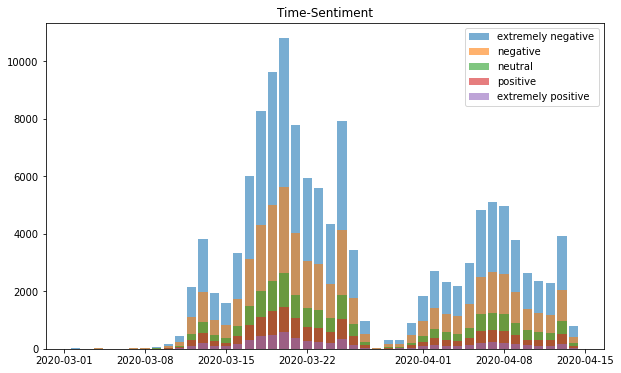

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(time, senti4, alpha=0.6)
plt.bar(time, senti3, alpha=0.6)
plt.bar(time, senti2, alpha=0.6)
plt.bar(time, senti1, alpha=0.6)
plt.bar(time, senti0, alpha=0.6)

plt.title("Time-Sentiment")
plt.legend(labels=['extremely negative', 'negative', 'neutral', 'positive', 'extremely positive'])
plt.show()

In [14]:
for i in range(len(time)):
  senti0[i] = senti0[i]/senti4[i]
  senti1[i] = senti1[i]/senti4[i]
  senti2[i] = senti2[i]/senti4[i]
  senti3[i] = senti3[i]/senti4[i]
  senti4[i] = 1

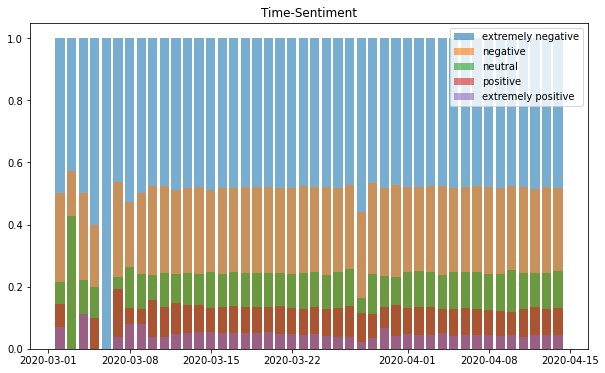

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(time, senti4, alpha=0.6)
plt.bar(time, senti3, alpha=0.6)
plt.bar(time, senti2, alpha=0.6)
plt.bar(time, senti1, alpha=0.6)
plt.bar(time, senti0, alpha=0.6)

plt.title("Time-Sentiment")
plt.legend(labels=['extremely negative', 'negative', 'neutral', 'positive', 'extremely positive'])
plt.show()

#Word Frequency

In [16]:
df = pd.read_csv('/content/drive/My Drive/6000/test.csv')
data.append(df)

,text,emotion
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,3
3794,Did you panic buy a lot of non-perishable item...,1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,2
3796,Gov need to do somethings instead of biar je r...,0


In [17]:
def removing(text):
  # remove urls
  url = re.compile(r'https?://\S+|www\.\S+')
  text = url.sub(r'', text)
  # remove html
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  # lower casing
  text = text.lower()
  # remove "&amp; &lt; &gt;"
  html_parser = HTMLParser()
  text = html_parser.unescape(text)
  # remove punct
  text = re.sub(r"[^\w\s\d]","", text)
  # remove mention
  text = re.sub(r'@\w+','',text)
  # remove hashtags
  text = re.sub(r'#\w+','',text)
  # remove stopwords
  text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
  # remove extra white space
  text = re.sub(r"\s+"," ",text).strip()
  # remove number
  text = re.sub(r'\s\d+', '', text)
  return text

unigram

In [18]:
ex_neg = data['text'].loc[data['emotion']==0]
neg = data['text'].loc[data['emotion']==1]
neural = data['text'].loc[data['emotion']==2]
pos = data['text'].loc[data['emotion']==3]
ex_pos = data['text'].loc[data['emotion']==4]

np0 = np.array(ex_neg)
np1 = np.array(neg)
np2 = np.array(neural)
np3 = np.array(pos)
np4 = np.array(ex_pos)

l0 = np0.tolist()
l1 = np1.tolist()
l2 = np2.tolist()
l3 = np3.tolist()
l4 = np4.tolist()

text0 = ". ".join(l0)
text1 = ". ".join(l1)
text2 = ". ".join(l2)
text3 = ". ".join(l3)
text4 = ". ".join(l4)

In [19]:
text0 = removing(text0)
text1 = removing(text1)
text2 = removing(text2)
text3 = removing(text3)
text4 = removing(text4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  if sys.path[0] == '':


In [20]:
wf1 = Counter((text0+' '+text1).split())
common1 = wf1.most_common(20)
wf2 = Counter(text2.split())
common2 = wf2.most_common(20)
wf3 = Counter((text3+' '+text4).split())
common3 = wf3.most_common(20)

In [21]:
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []
for i in range(19,-1,-1):
  x1.append(common1[i][0])
  x2.append(common2[i][0])
  x3.append(common3[i][0])
  
  y1.append(common1[i][1])
  y2.append(common2[i][1])
  y3.append(common3[i][1])

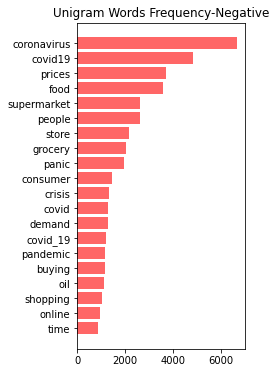

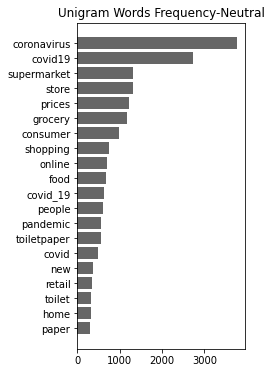

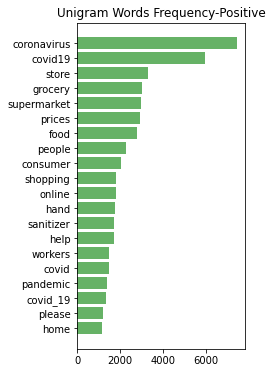

In [32]:
plt.figure(figsize=(3, 6))
plt.barh(x1, y1, alpha=0.6, color='r')
plt.title("Unigram Words Frequency-Negative")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh(x2, y2, alpha=0.6, color='k')
plt.title("Unigram Words Frequency-Neutral")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh(x3, y3, alpha=0.6, color='g')
plt.title("Unigram Words Frequency-Positive")
plt.show()

In [33]:
#Word Polarity
wf_total = Counter((text0+' '+text1+' '+text2+' '+text3+' '+text4).split())
temp = dict(wf_total)

temp1 = dict(wf1)
temp2 = dict(wf2)
temp3 = dict(wf3)
wp1 = [[1,1]]
wp2 = [[1,1]]
wp3 = [[1,1]]
for i in list(wf1):
  if temp1[i]!=temp[i]:
    wp1.append([i,temp1[i]/temp[i]])
for i in list(wf2):
  if temp2[i]!=temp[i]:
    wp2.append([i,temp2[i]/temp[i]])
for i in list(wf3):
  if temp3[i]!=temp[i]:
    wp3.append([i,temp3[i]/temp[i]])

In [34]:
wp1.sort(key=lambda x:x[1], reverse=True)
wp2.sort(key=lambda x:x[1], reverse=True)
wp3.sort(key=lambda x:x[1], reverse=True)

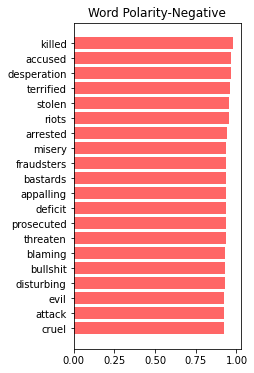

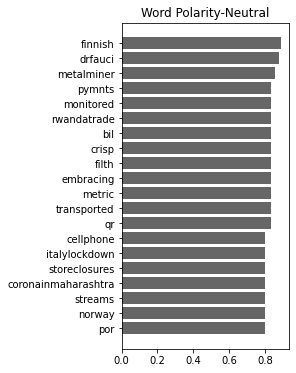

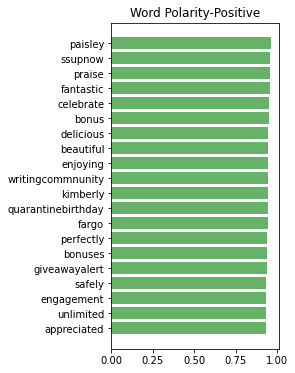

In [35]:
plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp1[20:0:-1]], [i[1] for i in wp1[20:0:-1]], alpha=0.6, color='r')
plt.title("Word Polarity-Negative")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp2[20:0:-1]], [i[1] for i in wp2[20:0:-1]], alpha=0.6, color='k')
plt.title("Word Polarity-Neutral")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp3[20:0:-1]], [i[1] for i in wp3[20:0:-1]], alpha=0.6, color='g')
plt.title("Word Polarity-Positive")
plt.show()

bigram

In [36]:
w1 = (text0+' '+text1).split()
w2 = text2.split()
w3 = (text3+' '+text4).split()

In [37]:
bigram1 = []
bigram2 = []
bigram3 = []
for i in range(len(w1)-1):
  bigram1.append(w1[i]+' '+w1[i+1])
for i in range(len(w2)-1):
  bigram2.append(w2[i]+' '+w2[i+1])
for i in range(len(w3)-1):
  bigram3.append(w3[i]+' '+w3[i+1])

In [38]:
wf2_1 = Counter(bigram1)
wf2_2 = Counter(bigram2)
wf2_3 = Counter(bigram3)
common2_1 = wf2_1.most_common(20)
common2_2 = wf2_2.most_common(20)
common2_3 = wf2_3.most_common(20)

In [39]:
x2_1 = []
x2_2 = []
x2_3 = []
y2_1 = []
y2_2 = []
y2_3 = []
for i in range(19,-1,-1):
  x2_1.append(common2_1[i][0])
  x2_2.append(common2_2[i][0])
  x2_3.append(common2_3[i][0])
  
  y2_1.append(common2_1[i][1])
  y2_2.append(common2_2[i][1])
  y2_3.append(common2_3[i][1])

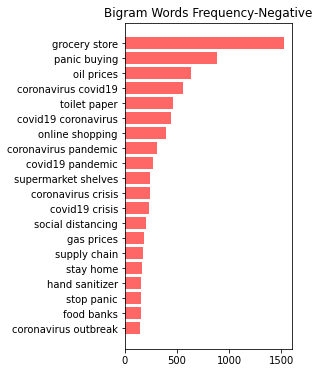

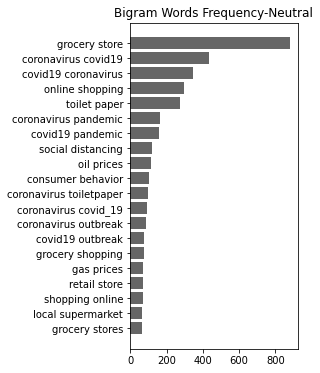

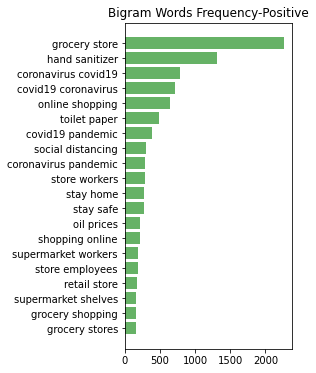

In [41]:
plt.figure(figsize=(3, 6))
plt.barh(x2_1, y2_1, alpha=0.6, color='r')
plt.title("Bigram Words Frequency-Negative")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh(x2_2, y2_2, alpha=0.6, color='k')
plt.title("Bigram Words Frequency-Neutral")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh(x2_3, y2_3, alpha=0.6, color='g')
plt.title("Bigram Words Frequency-Positive")
plt.show()

In [42]:
#Word Polarity
wf_total = wf2_1+wf2_2+wf2_3
temp = dict(wf_total)

temp2_1 = dict(wf2_1)
temp2_2 = dict(wf2_2)
temp2_3 = dict(wf2_3)
wp2_1 = [[1,1]]
wp2_2 = [[1,1]]
wp2_3 = [[1,1]]
for i in list(wf2_1):
  if temp2_1[i]!=temp[i]:
    wp2_1.append([i,temp2_1[i]/temp[i]])
for i in list(wf2_2):
  if temp2_2[i]!=temp[i]:
    wp2_2.append([i,temp2_2[i]/temp[i]])
for i in list(wf2_3):
  if temp2_3[i]!=temp[i]:
    wp2_3.append([i,temp2_3[i]/temp[i]])

In [43]:
wp2_1.sort(key=lambda x:x[1], reverse=True)
wp2_2.sort(key=lambda x:x[1], reverse=True)
wp2_3.sort(key=lambda x:x[1], reverse=True)

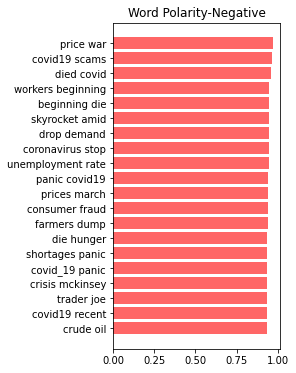

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32878 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32878 missing from current font.
  font.set_text(s, 0, flags=flags)


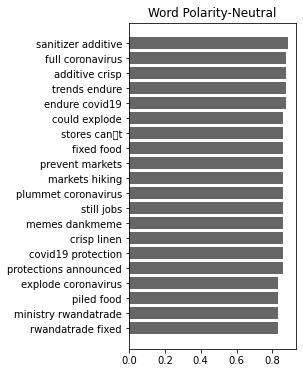

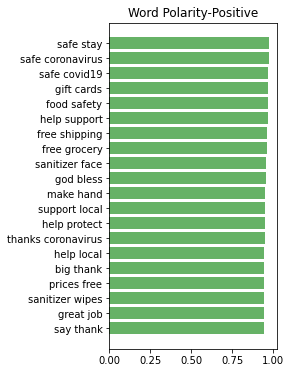

In [44]:
plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp2_1[20:0:-1]], [i[1] for i in wp2_1[20:0:-1]], alpha=0.6, color='r')
plt.title("Word Polarity-Negative")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp2_2[20:0:-1]], [i[1] for i in wp2_2[20:0:-1]], alpha=0.6, color='k')
plt.title("Word Polarity-Neutral")
plt.show()

plt.figure(figsize=(3, 6))
plt.barh([i[0] for i in wp2_3[20:0:-1]], [i[1] for i in wp2_3[20:0:-1]], alpha=0.6, color='g')
plt.title("Word Polarity-Positive")
plt.show()

trigram (效果不好)

In [45]:
trigram1 = []
trigram2 = []
trigram3 = []
for i in range(len(w1)-2):
  trigram1.append(w1[i]+' '+w1[i+1]+' '+w1[i+2])
for i in range(len(w2)-2):
  trigram2.append(w2[i]+' '+w2[i+1]+' '+w2[i+2])
for i in range(len(w3)-2):
  trigram3.append(w3[i]+' '+w3[i+1]+' '+w3[i+2])

In [46]:
wf3_1 = Counter(trigram1)
wf3_2 = Counter(trigram2)
wf3_3 = Counter(trigram3)
common3_1 = wf3_1.most_common(9)
common3_2 = wf3_2.most_common(9)
common3_3 = wf3_3.most_common(9)

In [47]:
x3_1 = []
x3_2 = []
x3_3 = []
y3_1 = []
y3_2 = []
y3_3 = []
for i in range(8,-1,-1):
  x3_1.append(common3_1[i][0])
  x3_2.append(common3_2[i][0])
  x3_3.append(common3_3[i][0])
  
  y3_1.append(common3_1[i][1])
  y3_2.append(common3_2[i][1])
  y3_3.append(common3_3[i][1])

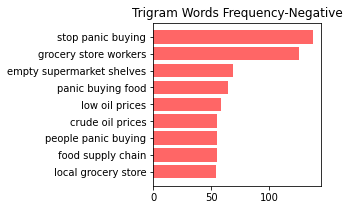

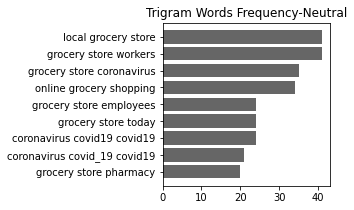

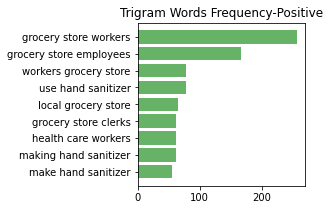

In [48]:
plt.figure(figsize=(3, 3))
plt.barh(x3_1, y3_1, alpha=0.6, color='r')
plt.title("Trigram Words Frequency-Negative")
plt.show()

plt.figure(figsize=(3, 3))
plt.barh(x3_2, y3_2, alpha=0.6, color='k')
plt.title("Trigram Words Frequency-Neutral")
plt.show()

plt.figure(figsize=(3, 3))
plt.barh(x3_3, y3_3, alpha=0.6, color='g')
plt.title("Trigram Words Frequency-Positive")
plt.show()

In [49]:
#Word Polarity
wf_total = wf3_1+wf3_2+wf3_3
temp = dict(wf_total)

temp3_1 = dict(wf3_1)
temp3_2 = dict(wf3_2)
temp3_3 = dict(wf3_3)
wp3_1 = [[1,1]]
wp3_2 = [[1,1]]
wp3_3 = [[1,1]]
for i in list(wf3_1):
  if temp3_1[i]!=temp[i]:
    wp3_1.append([i,temp3_1[i]/temp[i]])
for i in list(wf3_2):
  if temp3_2[i]!=temp[i]:
    wp3_2.append([i,temp3_2[i]/temp[i]])
for i in list(wf3_3):
  if temp3_3[i]!=temp[i]:
    wp3_3.append([i,temp3_3[i]/temp[i]])

In [50]:
wp3_1.sort(key=lambda x:x[1], reverse=True)
wp3_2.sort(key=lambda x:x[1], reverse=True)
wp3_3.sort(key=lambda x:x[1], reverse=True)

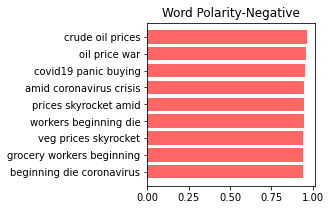

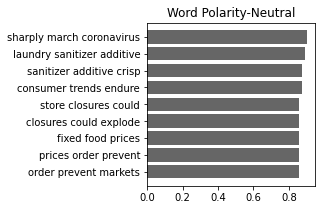

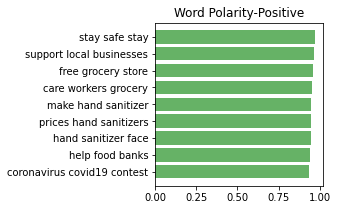

In [51]:
plt.figure(figsize=(3, 3))
plt.barh([i[0] for i in wp3_1[9:0:-1]], [i[1] for i in wp3_1[9:0:-1]], alpha=0.6, color='r')
plt.title("Word Polarity-Negative")
plt.show()

plt.figure(figsize=(3, 3))
plt.barh([i[0] for i in wp3_2[9:0:-1]], [i[1] for i in wp3_2[9:0:-1]], alpha=0.6, color='k')
plt.title("Word Polarity-Neutral")
plt.show()

plt.figure(figsize=(3, 3))
plt.barh([i[0] for i in wp3_3[9:0:-1]], [i[1] for i in wp3_3[9:0:-1]], alpha=0.6, color='g')
plt.title("Word Polarity-Positive")
plt.show()

#WordCloud

Pentaclassificaiton

In [52]:
wordcloud0 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Reds", stopwords = stopwords, scale=2, margin=5).generate(text0)
wordcloud1 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Oranges", stopwords = stopwords, scale=2, margin=5).generate(text1)
wordcloud2 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Greys", stopwords = stopwords, scale=2, margin=5).generate(text2)
wordcloud3 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Blues", stopwords = stopwords, scale=2, margin=5).generate(text3)
wordcloud4 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Greens", stopwords = stopwords, scale=2, margin=5).generate(text4)

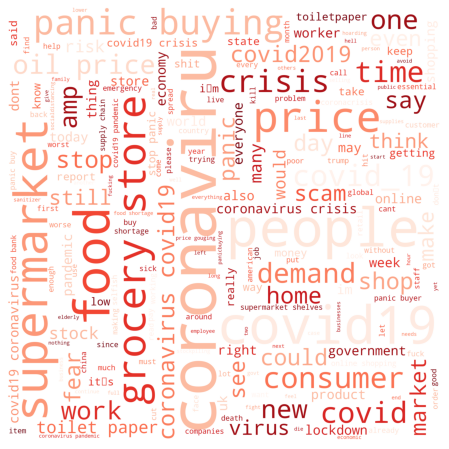

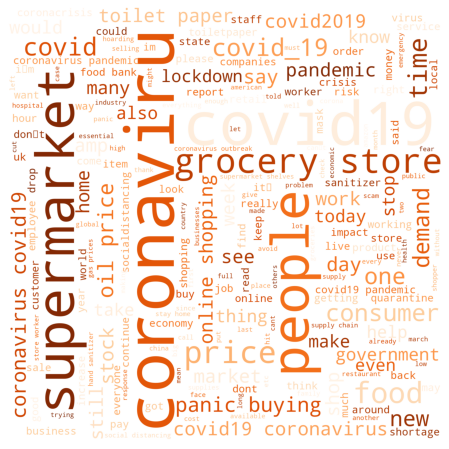

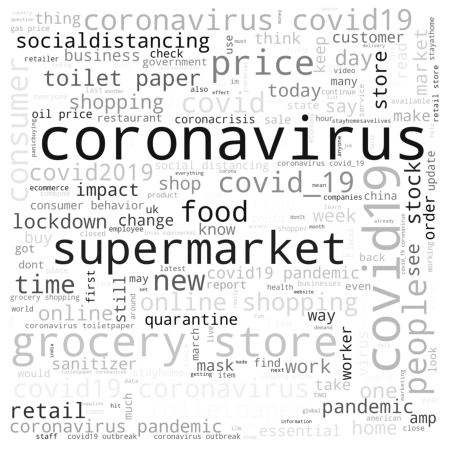

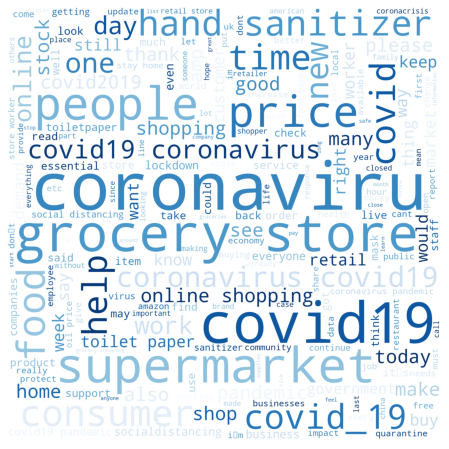

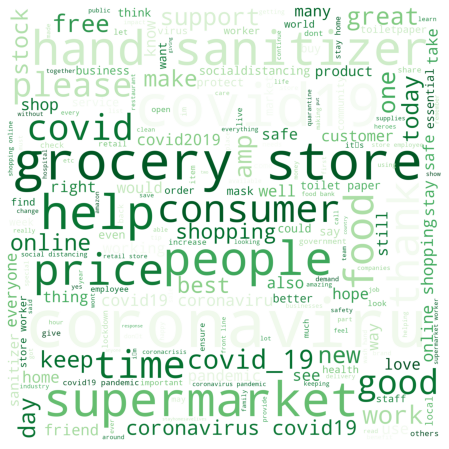

In [55]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud0)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

#wordcloud0.to_file('text0.jpg')
#wordcloud1.to_file('text1.jpg')
#wordcloud2.to_file('text2.jpg')
#wordcloud3.to_file('text3.jpg')
#wordcloud4.to_file('text4.jpg')

Tripleclassification

In [56]:
wordcloud1_1 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Reds", stopwords = stopwords, scale=2, margin=5).generate(text1+text0)
wordcloud1_2 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Greys", stopwords = stopwords, scale=2, margin=5).generate(text2)
wordcloud1_3 = WordCloud(background_color="white",width=1000, height=1000, prefer_horizontal=0.7, colormap="Greens", stopwords = stopwords, scale=2, margin=5).generate(text3+text4)

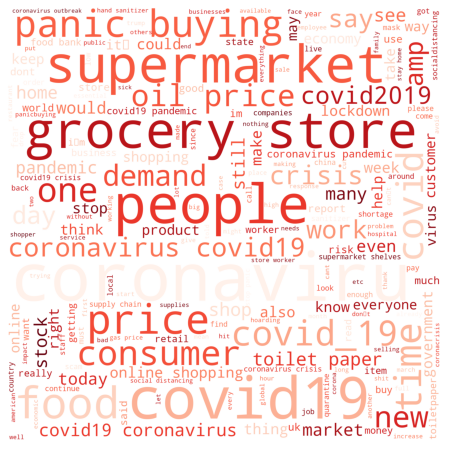

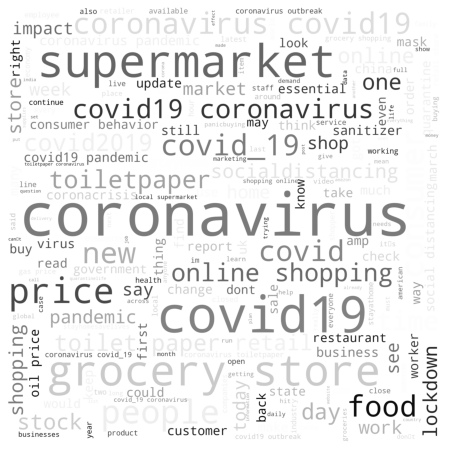

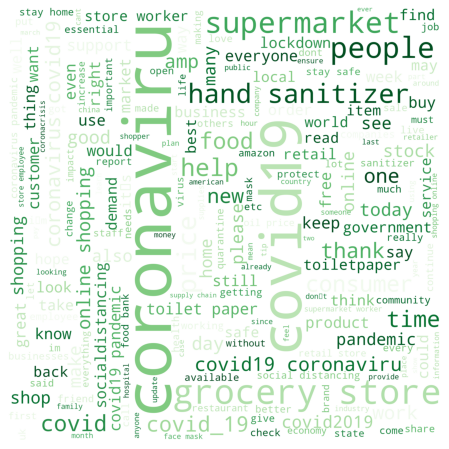

In [57]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud1_1)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud1_2)
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud1_3)
plt.axis("off")
plt.show()

#wordcloud1_1.to_file('text5.jpg')
#wordcloud1_2.to_file('text6.jpg')
#wordcloud1_3.to_file('text7.jpg')

In [58]:
#Word Polarity
wf_total = Counter((text0+' '+text1+' '+text2+' '+text3+' '+text4).split())
temp = dict(wf_total)

temp1 = dict(wf1)
temp2 = dict(wf2)
temp3 = dict(wf3)
wp1 = [[1,1]]
wp2 = [[1,1]]
wp3 = [[1,1]]
for i in list(wf1):
  if temp1[i]!=temp[i]:
    wp1.append([i,temp1[i]/temp[i]])
for i in list(wf2):
  if temp2[i]!=temp[i]:
    wp2.append([i,temp2[i]/temp[i]])
for i in list(wf3):
  if temp3[i]!=temp[i]:
    wp3.append([i,temp3[i]/temp[i]])

#Sentence length

In [59]:
words0 = ex_neg.str.split()
words1 = neg.str.split()
words2 = neural.str.split()
words3 = pos.str.split()
words4 = ex_pos.str.split()

word1 = []
word2 = []
word3 = []

for i in range(len(words0)):
  word1.append(len(words0.iloc[i]))
for i in range(len(words1)):
  word1.append(len(words1.iloc[i]))
for i in range(len(words2)):
  word2.append(len(words2.iloc[i]))
for i in range(len(words3)):
  word3.append(len(words3.iloc[i]))
for i in range(len(words4)):
  word3.append(len(words4.iloc[i]))

len1 = Counter(word1)
len2 = Counter(word2)
len3 = Counter(word3)

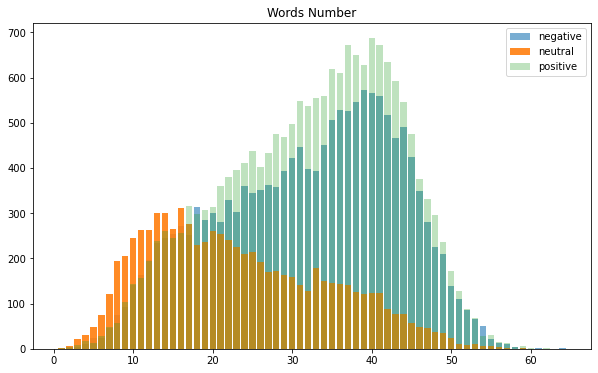

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(len1.keys(), len1.values(), alpha=0.6)
plt.bar(len2.keys(), len2.values(), alpha=0.9)
plt.bar(len3.keys(), len3.values(), alpha=0.3)
plt.title("Words Number")
plt.legend(labels=['negative', 'neutral', 'positive'])
plt.show()